In [6]:
import pandas as pd

In [7]:
#데이터 불러오기
data = pd.read_csv('/Users/jeonginn/Desktop/ML/data/train_data/train_task_3_4.csv')
data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [8]:
len(data)

1382727

In [9]:
data.shape

(1382727, 6)

In [10]:
import matplotlib.pyplot as plt

In [11]:
# 열 이름 정리
data.columns = data.columns.str.strip()
data.columns

Index(['QuestionId', 'UserId', 'AnswerId', 'IsCorrect', 'CorrectAnswer',
       'AnswerValue'],
      dtype='object')

In [12]:
# 'IsCorrect' 열의 값에 따라 그룹화한 후'CorrectAnswer' 열의 평균을 계산
data_CorrectAnswer = data.groupby('IsCorrect')['CorrectAnswer'].mean()
data_CorrectAnswer

IsCorrect
0    2.392943
1    2.388391
Name: CorrectAnswer, dtype: float64

In [13]:
data_AnswerValue = data.groupby('IsCorrect')['AnswerValue'].mean()
data_AnswerValue

IsCorrect
0    2.495598
1    2.388391
Name: AnswerValue, dtype: float64

In [14]:
# AnswerValue과 CorrectAnswer이 다른 행 출력
data_diff = data.loc[data['AnswerValue'] != data['CorrectAnswer']]
data_diff

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
6,932,3923,6545,0,4,3
7,134,5163,1042162,0,1,2
8,370,3854,453105,0,2,3
9,840,3896,150788,0,1,2
16,11,5482,648990,0,2,3
...,...,...,...,...,...,...
1382717,237,3356,981679,0,3,1
1382718,658,579,1455920,0,1,4
1382721,196,4409,430830,0,1,2
1382723,707,2549,584230,0,2,1


In [15]:
#결측치
data.isnull().sum()

QuestionId       0
UserId           0
AnswerId         0
IsCorrect        0
CorrectAnswer    0
AnswerValue      0
dtype: int64

In [16]:
data.corr()
#IsCorrect와 CorrectAnswer 약한 음의 상관관계

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
QuestionId,1.000000,0.000600,0.001049,0.029008,0.018732,0.012652
UserId,0.000600,1.000000,0.000566,-0.003327,0.000069,-0.001247
AnswerId,0.001049,0.000566,1.000000,0.000539,-0.001257,0.000735
IsCorrect,0.029008,-0.003327,0.000539,1.000000,-0.002128,-0.050068
CorrectAnswer,0.018732,0.000069,-0.001257,-0.002128,1.000000,0.388003
AnswerValue,0.012652,-0.001247,0.000735,-0.050068,0.388003,1.000000


In [17]:
data.describe()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
count,1.382727e+06,1.382727e+06,1.382727e+06,1.382727e+06,1.382727e+06,1.382727e+06
mean,4.682276e+02,3.036283e+03,7.544279e+05,5.373317e-01,2.390497e+00,2.437992e+00
std,2.735797e+02,1.770599e+03,4.356190e+05,4.986046e-01,1.066479e+00,1.067624e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.330000e+02,1.515000e+03,3.772935e+05,0.000000e+00,1.000000e+00,2.000000e+00
50%,4.680000e+02,3.009000e+03,7.544530e+05,1.000000e+00,2.000000e+00,2.000000e+00
75%,7.030000e+02,4.565000e+03,1.131772e+06,1.000000e+00,3.000000e+00,3.000000e+00
max,9.470000e+02,6.147000e+03,1.508916e+06,1.000000e+00,4.000000e+00,4.000000e+00


In [18]:
#데이터를 QuestionId로 그룹화한 후에, 각 그룹별로 문제 ID, 데이터 개수, 정답률 평균, 정답률 표준 오차를 출력
for k, df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem())
    
# 난이도가 높은 문제는 정답률이 낮음, 구분력이 높은 문제는 정답률의 표준 오차가 작음
# 정답률 평균과 표준 오차는 각 문제의 난이도와 구분력을 나타냄
# -> 난이도와 구분력이 높은 문제는 학생들의 학습 성과를 평가하는 데에 유용

# ex) 난이도가 높지만 구분력이 낮은 문제의 경우, 학생들이 무작정 추측하여 맞출 가능성이 높음
# -> 해당 문제의를 개선 필요

0 2812 0.44345661450924606 0.009370109336123865
1 14 0.5714285714285714 0.13725270326150324
2 2313 0.3852140077821012 0.01012089927190472
3 2672 0.8087574850299402 0.007609645680958997
4 1704 0.4014084507042254 0.011878216105764141
5 833 0.1908763505402161 0.013624539924512919
6 1718 0.5285215366705471 0.012046950521125577
7 89 0.34831460674157305 0.05078827950334113
8 2327 0.3919209282337774 0.010122188032315182
9 834 0.36330935251798563 0.016664029411268565
10 1572 0.4020356234096692 0.012370345562832924
11 2171 0.45831414094887146 0.010696101386212253
12 1701 0.3991769547325103 0.011877678361556359
13 1259 0.6965845909451946 0.012961803326362792
14 1697 0.6682380671773719 0.011433151502268899
15 4 0.5 0.28867513459481287
16 2300 0.5834782608695652 0.010281623364912677
17 848 0.42924528301886794 0.017007317337094298
18 2173 0.3175333640128854 0.009988619831022786
19 2692 0.6355869242199108 0.009277428244661849
20 1707 0.6338605741066198 0.011663545946428995
21 137 0.40875912408759124

In [19]:
grouped_data = data.groupby('QuestionId').agg({'IsCorrect': ['count', 'mean', 'sem']})
grouped_data.columns = ['count', 'mean', 'sem']
grouped_data

# 정답률 평균과 표준 오차는 각 문제의 난이도와 구분력을 나타냄
# -> 난이도와 구분력이 높은 문제는 학생들의 학습 성과를 평가하는 데에 유용

# ex) 난이도가 높지만 구분력이 낮은 문제의 경우, 학생들이 무작정 추측하여 맞출 가능성이 높음
# -> 해당 문제의를 개선 필요

,count,mean,sem
QuestionId,,,
0,2812,0.443457,0.009370
1,14,0.571429,0.137253
2,2313,0.385214,0.010121
3,2672,0.808757,0.007610
4,1704,0.401408,0.011878
...,...,...,...
943,2653,0.566528,0.009623
944,189,0.142857,0.025521
945,2337,0.422336,0.010220


In [23]:
import statsmodels.formula.api as smf


lm = smf.ols(formula='I(grouped_data.index) ~ (sem + (abs(50-mean))/count) - I(grouped_data.index/1000)', data=grouped_data)
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     I(grouped_data.index)   R-squared:                       0.013
Model:                               OLS   Adj. R-squared:                  0.009
Method:                    Least Squares   F-statistic:                     4.010
Date:                   Thu, 11 May 2023   Prob (F-statistic):            0.00752
Time:                           15:41:46   Log-Likelihood:                -6659.2
No. Observations:                    948   AIC:                         1.333e+04
Df Residuals:                        944   BIC:                         1.335e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.027e+04   2920.806      3.517      0.000    4540.812     1.6e+04
sem                    -96.5547    247.274     -0.390      0.696    -581.825     388.715
abs(50 - mean)        -197.3933     58.918     -3.350      0.001    -313.019     -81.767
abs(50 - mean):count    -0.0004      0.000     -1.694      0.091      -0.001    5.96e-05
==============================================================================
Omnibus:                      550.448   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.130
Skew:                           0.022   Prob(JB):                     1.76e-12
Kurtosis:                       1.830   Cond. No.                     2.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

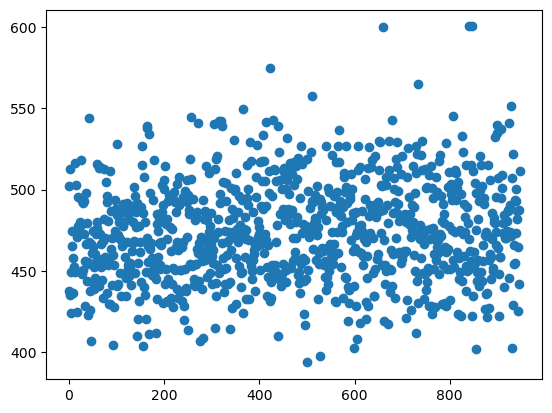

In [25]:
predicted_values = lm.fit().predict(grouped_data)
plt.scatter(grouped_data.index, predicted_values)


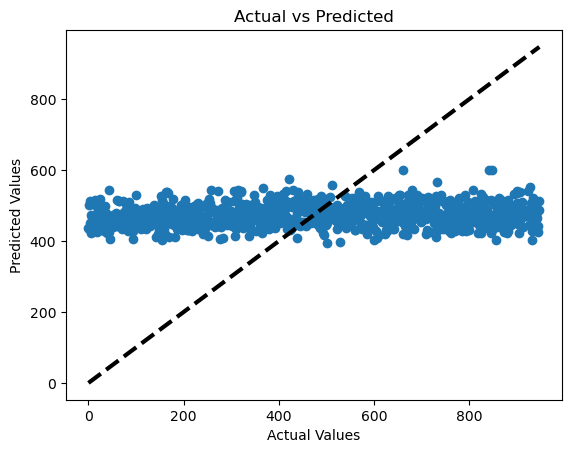

In [27]:
import matplotlib.pyplot as plt

# 예측값과 실제값 비교를 위한 데이터 프레임 생성
pred_data = pd.DataFrame({'y_true': grouped_data.index,
                          'y_pred': lm.fit().predict()})

# 산점도 그리기
plt.scatter(pred_data['y_true'], pred_data['y_pred'])

# 대각선 그리기
plt.plot([pred_data['y_true'].min(), pred_data['y_true'].max()], 
         [pred_data['y_true'].min(), pred_data['y_true'].max()], 
         'k--', lw=3)

# 그래프 꾸미기
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
data = pd.read_csv('/Users/jeonginn/Desktop/ML/data/train_data/train_task_3_4.csv')
data.head()

In [ ]:
mean_mean = grouped_data['mean'].mean()
std_mean = grouped_data['mean'].std()
median_mean = grouped_data['mean'].median()

print(mean_mean, std_mean, median_mean)

# 정답률이 0.35 이하인 문제가 어려운 문제로 판단

In [ ]:
mean_sem = grouped_data['sem'].mean()
std_sem = grouped_data['sem'].std()
median_sem = grouped_data['sem'].median()

print(mean_sem, std_sem, median_sem)

# 구분력이 높은 문제는 표준편차가 0.04299853956024113보다 큰 문제

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 학습에 사용할 변수 선택
features = ['QuestionId', 'UserId', 'AnswerId', 'CorrectAnswer', 'AnswerValue']

# 결측치 처리
data = data[features].dropna()

# 독립변수와 종속변수 분리
X = data.drop('AnswerValue', axis=1)
y = data['AnswerValue']

# 학습 데이터와 검증 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성
model = LinearRegression()

# 학습 데이터를 사용하여 모델 학습
model.fit(X_train, y_train)

# 검증 데이터를 사용하여 모델 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R2:', r2)

#MSE 크고, R2도 0.5에 미치지 못하는 수치이기 때문에 이 모델은 아직 예측 성능을 개선해야함

In [ ]:
# 입력 변수와 출력 변수 정의
X = data[['QuestionId', 'UserId', 'AnswerId', 'CorrectAnswer', 'AnswerValue']]
y = data['IsCorrect']
from sklearn.model_selection import train_test_split

# 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier()

# 학습용 데이터셋으로 모델 학습
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# 테스트용 데이터셋으로 모델 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#Accuracy: 1.0일 경우 overfitting일 가능성이 큼

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('/Users/jeonginn/Desktop/ML/data/train_data/train_task_3_4.csv')

# 입력 변수와 타깃 변수 분리
X = data[['QuestionId', 'UserId', 'AnswerId', 'CorrectAnswer', 'AnswerValue']]
y = data['IsCorrect']

# 학습용과 검증용으로 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정나무 모델 생성
model = DecisionTreeClassifier()

# 학습용 데이터로 모델 학습
model.fit(X_train, y_train)

# 검증용 데이터로 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#Accuracy: 1.0일 경우 overfitting일 가능성이 큼

In [ ]:
eval_validation = pd.read_csv('/Users/jeonginn/Desktop/ML/data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

In [ ]:
# T로 시작하는 변수들만을 추출하여, 각 행(row)의 평균값을 구하고, 이를 'score' 열에 추가
eval_validation['score'] = eval_validation.filter(regex='^T', axis=1).mean(axis=1)
eval_validation['score'].hist()

In [ ]:
eval_validation['score']

In [ ]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [ ]:
eval_test = pd.read_csv('/Users/jeonginn/Desktop/ML/data/test_data/quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

In [ ]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

In [ ]:
template = pd.read_csv('/Users/jeonginn/Desktop/ML/question_quality_assessment/submission/template.csv')
len(template)

In [ ]:
template.head()

In [ ]:
template['ranking'] = 1

In [ ]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)
    
evaluate(eval_validation, template)